In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
df=df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [6]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [7]:
df['Gender'].replace({'Female': 1,'Male': 0},inplace=True)

In [8]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']


In [9]:
df=pd.get_dummies(data=df,columns=['Geography','NumOfProducts'])

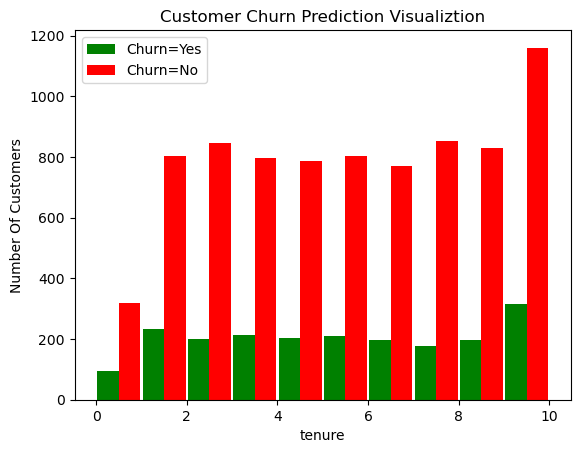

In [10]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [11]:
cols_to_scale = ['Tenure','CreditScore','Age','Balance','EstimatedSalary']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [12]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,1,0.324324,0.2,0.000000,1,1,0.506735,1,1,0,0,1,0,0,0
1,0.516,1,0.310811,0.1,0.334031,0,1,0.562709,0,0,0,1,1,0,0,0
2,0.304,1,0.324324,0.8,0.636357,1,0,0.569654,1,1,0,0,0,0,1,0
3,0.698,1,0.283784,0.1,0.000000,0,0,0.469120,0,1,0,0,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,1,1,0.395400,0,0,0,1,1,0,0,0


In [13]:
df.drop('HasCrCard',axis=1,inplace=True)

In [14]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
x_train.shape

(8000, 14)

# Creating the Neural Network Model

In [17]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(14, input_dim=14, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5239 - accuracy: 0.7667
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4342 - accuracy: 0.8092
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4103 - accuracy: 0.8211
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8278
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3891 - accuracy: 0.8328
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3838 - accuracy: 0.8355
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3799 - accuracy: 0.8370
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3769 - accuracy: 0.8390
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3749 - accuracy: 0.8399
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3735 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8568
Epoch 82/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3417 - accuracy: 0.8576
Epoch 83/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3418 - accuracy: 0.8583
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8566
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8574
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8558
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8580
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3409 - accuracy: 0.8597
Epoch 89/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3415 - accuracy: 0.8587
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3409 - accuracy: 

# Method 1 for handling imbalanced data (Undersampling)

In [18]:
count_Exited_0,count_Exited_1 = df['Exited'].value_counts()
df_class_0 = df[df['Exited']==0]
df_class_1= df[df['Exited']==1]

In [19]:
df_class_0_under = df_class_0.sample(count_Exited_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
0    2037
1    2037
Name: Exited, dtype: int64


In [20]:
X = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [21]:
y_preds1 = ANN(x_train1, y_train1, x_test1, y_test1, 'binary_crossentropy', -1)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.6863 - accuracy: 0.5581
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.6527
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.6922
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5658 - accuracy: 0.7100
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7199
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.7291
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.7361
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.7380
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7389
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5152 - accura

102/102 [==============================] - 0s 3ms/step - loss: 0.4701 - accuracy: 0.7739
Epoch 82/100
102/102 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.7748
Epoch 83/100
102/102 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7782
Epoch 84/100
102/102 [==============================] - 0s 3ms/step - loss: 0.4695 - accuracy: 0.7736
Epoch 85/100
102/102 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.7763
Epoch 86/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7739
Epoch 87/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.7729
Epoch 88/100
102/102 [==============================] - 0s 3ms/step - loss: 0.4683 - accuracy: 0.7782
Epoch 89/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7739
Epoch 90/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4680 - accuracy: 

# Method 2 for handling imbalanced data (Oversampling)

In [22]:
df_class_1_over = df_class_1.sample(count_Exited_0, replace=True)
df_test_over = pd.concat([df_class_1_over,df_class_0],axis=0)
print('over-sampling:')
print(df_test_over.Exited.value_counts())

over-sampling:
1    7963
0    7963
Name: Exited, dtype: int64


In [23]:
X = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [24]:
y_preds2 = ANN(x_train1, y_train1, x_test1, y_test1, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 2s 2ms/step - loss: 0.6079 - accuracy: 0.6743
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5337 - accuracy: 0.7286
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5132 - accuracy: 0.7473
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5054 - accuracy: 0.7537
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5015 - accuracy: 0.7580
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4998 - accuracy: 0.7586
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4973 - accuracy: 0.7611
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4959 - accuracy: 0.7633
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4938 - accuracy: 0.7630
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4922 - accura

399/399 [==============================] - 1s 2ms/step - loss: 0.4527 - accuracy: 0.7834
Epoch 82/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4527 - accuracy: 0.7829
Epoch 83/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4525 - accuracy: 0.7816
Epoch 84/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4531 - accuracy: 0.7820
Epoch 85/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.7833
Epoch 86/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4522 - accuracy: 0.7831
Epoch 87/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4522 - accuracy: 0.7838
Epoch 88/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.7829
Epoch 89/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4517 - accuracy: 0.7829
Epoch 90/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4525 - accuracy: 

# Method 3 for handling imbalanced data (SMOTE)

In [25]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

In [26]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [27]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
y_preds3 = ANN(x_train1, y_train1, x_test1, y_test1, 'binary_crossentropy', -1)

Epoch 1/100
399/399 [==============================] - 2s 2ms/step - loss: 0.5990 - accuracy: 0.6873
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5392 - accuracy: 0.7293
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5174 - accuracy: 0.7418
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5052 - accuracy: 0.7504
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4998 - accuracy: 0.7571
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4955 - accuracy: 0.7610
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4927 - accuracy: 0.7616
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4900 - accuracy: 0.7611
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4874 - accuracy: 0.7619
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4853 - accura

399/399 [==============================] - 1s 3ms/step - loss: 0.4459 - accuracy: 0.7864
Epoch 82/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4456 - accuracy: 0.7892
Epoch 83/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4459 - accuracy: 0.7870
Epoch 84/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4448 - accuracy: 0.7876
Epoch 85/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4456 - accuracy: 0.7876
Epoch 86/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4449 - accuracy: 0.7877
Epoch 87/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4446 - accuracy: 0.7888
Epoch 88/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4451 - accuracy: 0.7856
Epoch 89/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4445 - accuracy: 0.7873
Epoch 90/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4451 - accuracy: 

In [28]:
# using the SMOTE method gives the best for both 0 and 1 class